* **Aluno:** Ygor Souza de Oliveira
* **Disciplina:** Estratégias e Tendências Tecnológias Associadas ao  uso do Big Data
* **Atividade 01:** Utilizando Python para modelos de *Machine Learning*

# Exemplo de uma regressão linear simples em Python

Primeiro vamos importar as bibliotecas Necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lendo e processando o dataset

Vamos utilizar o dataset com dados sobre valores de imóveis disponível no [kaggle](https://www.kaggle.com/quantbruce/real-estate-price-prediction). Para simplificação, esse dataset está disponível no [link](https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0).

In [ ]:
!wget -c https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0 -O real_estate.csv

--2023-11-25 14:55:18--  https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/21kk53sgenipmob/Real%20estate.csv [following]
--2023-11-25 14:55:19--  https://www.dropbox.com/s/raw/21kk53sgenipmob/Real%20estate.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc9ec1c0ff0dca6ed78fe4c7162.dl.dropboxusercontent.com/cd/0/inline/CIPabpmxm7CUpHmIZ9JDSdIYJ5xBonH5Z1eNHq-HwfYFJCO-DIycJTxb9MHn68fOnQgux-AF69XT9-A9hli6UfTnEKhYo95EOh37xOFjYuRZ-NKenidfDPPtc8TAj1AzQPo/file# [following]
--2023-11-25 14:55:19--  https://ucc9ec1c0ff0dca6ed78fe4c7162.dl.dropboxusercontent.com/cd/0/inline/CIPabpmxm7CUpHmIZ9JDSdIYJ5xBonH5Z1eNHq-HwfYFJCO-DIycJTxb9MHn68fOnQgux-AF69XT9-A9hli6UfTnEKhYo95EOh37x

Vamos examinar o que temos nas 10 primeiras linhas do dataset utilizando o comando `head` do bash

In [ ]:
!head -10 real_estate.csv

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8
5,2012.833,5,390.5684,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8


In [ ]:
!tail -10 real_estate.csv

405,2013.333,16.4,289.3248,5,24.98203,121.54348,41.2
406,2012.667,23,130.9945,6,24.95663,121.53765,37.2
407,2013.167,1.9,372.1386,7,24.97293,121.54026,40.5
408,2013.000,5.2,2408.993,0,24.95505,121.55964,22.3
409,2013.417,18.5,2175.744,3,24.9633,121.51243,28.1
410,2013.000,13.7,4082.015,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.5431,50
412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.8101,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.5431,63.9


In [ ]:
! wc -l real_estate.csv

415 real_estate.csv


Agora vamos utilizar o [pandas](https://pandas.pydata.org/) para ler o nosso dataset e examinar o que temos nas primeiras linhas de daddos

In [ ]:
real_estate_data = pd.read_csv("real_estate.csv")

In [ ]:
real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


Vamos visualizar a relação da variável `Y house price of unit area` com a variável `X3 distance to the nearest MRT station`

Text(0, 0.5, 'Preço')

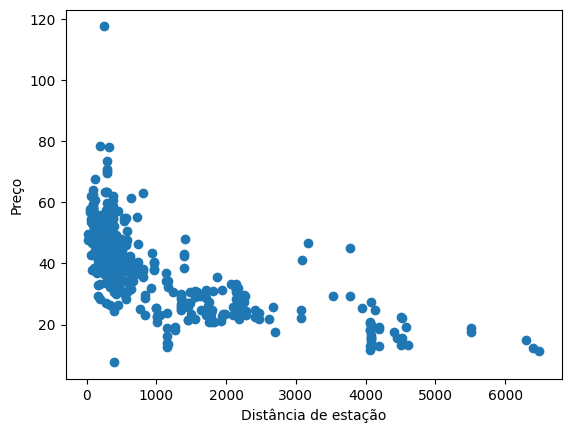

In [ ]:
plt.scatter(x=real_estate_data.iloc[:,3], y=real_estate_data.iloc[:,7])
plt.xlabel("Distância de estação")
plt.ylabel("Preço")

## Linear regression utilizando [scikit-learn](https://scikit-learn.org/stable/)

Vamos importar o módulo `linear_model` e instanciar uma regressão linear


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Precisamos manipular nossos dados para utilizar o scikit-learn, uma vez que o método `fit` recebe, como entrada arrays numpy de duas dimensões. Caso se utilize mais do que duas variáveis preditoras, deve-se remover o trecho `.reshape(-1,1)`

[Referência]( https://stackoverflow.com/questions/61367841/why-does-the-fit-method-in-sklearns-linearregression-only-accept-2d-array-for-t)

Campos do dataset:
*   1 = X1 transaction date	X2 house
*   2 = X2 house age
*   3 = X3 distance to the nearest MRT station
*   4 = X4 number of convenience stores
*   5 = X5 latitude
*   6 = X6 longitude
*   7 = Y house price of unit area

In [ ]:
#X = np.asarray(real_estate_data.iloc[:,2]).reshape(-1,1)
re_train, re_test = train_test_split(real_estate_data, train_size=0.7)
X_train = re_train.iloc[:,[2,3,4]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[2,3,4]]
y_test = re_test.iloc[:,-1]

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
391,6.2,1939.7490,1
354,12.2,1360.1390,1
53,13.3,492.2313,5
332,39.8,617.7134,2
214,18.1,1783.1800,3


In [ ]:
reg = linear_model.LinearRegression()

Agora vamos realizar o `fit` do modelo, i.e., cálculo dos parâmetros do nosso modelo linear.

In [ ]:
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-0.21190005, -0.00576217,  1.1552121 ])

In [ ]:
reg.intercept_

43.370469744605096

Agora vamos avaliar a qualidade do nosso modelo

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = reg.predict(X_test)

Vamos utilizar a métrica [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

In [ ]:
#Mean Squared Error bem próximo de 0 (ou seja, bom desempenho)
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculando rmse
rmse = np.sqrt(mse)

# Média dos valores reais
mean_y = np.mean(y_test)

# RMSE em percentual para facilitar leitura do resultado
rmse_percent = (rmse / mean_y) * 100

print('MSE:', mse)
print('RMSE em %:', rmse_percent)

MSE: 57.31709714168785
RMSE em %: 20.41793129506945


## Exercícios

1. Testar combinações de variáveis para melhorar o desempenho do regressor do tutorial anterior;
1. Utilizar o dataset [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality).
  1. Baixar dados relativos a Vinhos Tintos e Brancos;
  1. Criar modelos de regressão linear para cada um dos tipos de vinhos;
  1. Unir os dois datasets (para unir datasets utiliza esse [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects) como referência.
  1. Criar um modelo de regressão linear para o dataset unificado;

## 1) Melhor desempenho obtido dos testes de combinações

*Resultados:*
* MSE: 58.52
* RMSE em %: 19.50

*Variáveis utilizadas no modelo:*

* Idade da casa
* Distancia de estação de metrô
* Número de lojas de conveniencia



##2.1) Baixando dados relativos a Vinhos Tintos e Brancos

In [ ]:
# Carregando dados Vinho Branco
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate
!head winequality-white.csv

--2023-11-25 15:38:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [   <=>              ] 258.23K   423KB/s    in 0.6s    

2023-11-25 15:38:23 (423 KB/s) - ‘winequality-white.csv’ saved [264426]

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.

In [ ]:
# Carregando dados Vinho Tinto
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv --no-check-certificate
!head winequality-red.csv

--2023-11-25 15:38:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [  <=>               ]  82.23K   181KB/s    in 0.5s    

2023-11-25 15:38:24 (181 KB/s) - ‘winequality-red.csv’ saved [84199]

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5


In [ ]:
whitewine_data = pd.read_csv("winequality-white.csv", sep = ";")
redwine_data = pd.read_csv("winequality-red.csv", sep = ";")

In [ ]:
print("Colunas dataset vinho branco: ")
whitewine_data.head(5)

Colunas dataset vinho branco: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
print("Colunas dataset vinho tinto: ")
redwine_data.head(5)

Colunas dataset vinho tinto: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2.2.1) Gerando modelo para qualidade de vinho branco

Campos do dataset:
*   0 = fixed acidity
*   1 = volatile acidity
*   2 = citric acid
*   3 = residual sugar
*   4 = chlorides
*   5 = free sulfur dioxide
*   6 = total sulfur dioxide
*   7 = density
*   8 = pH
*   9 = sulphates
*   10 = alcohol
*   11 = quality (alvo)

Text(0, 0.5, 'Qualidade')

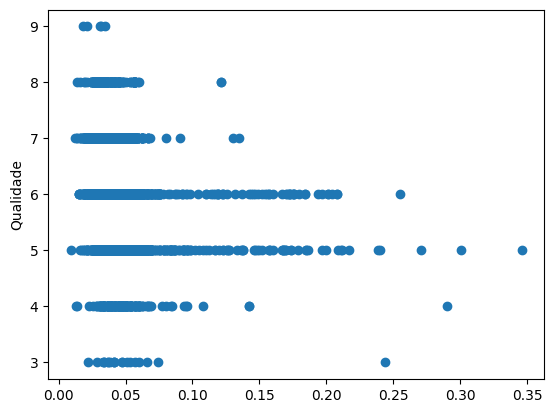

In [ ]:
# Analisando relações com a qualidade do Vinho Branco
plt.scatter(x=whitewine_data.iloc[:,4], y=whitewine_data.iloc[:,11])
plt.xlabel("")
plt.ylabel("Qualidade")

In [ ]:
re_train, re_test = train_test_split(whitewine_data, train_size=0.7)
X_train = re_train.iloc[:,[1,4,7,10]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[1,4,7,10]]
y_test = re_test.iloc[:,-1]

Analisando matriz de correlação das variáveis

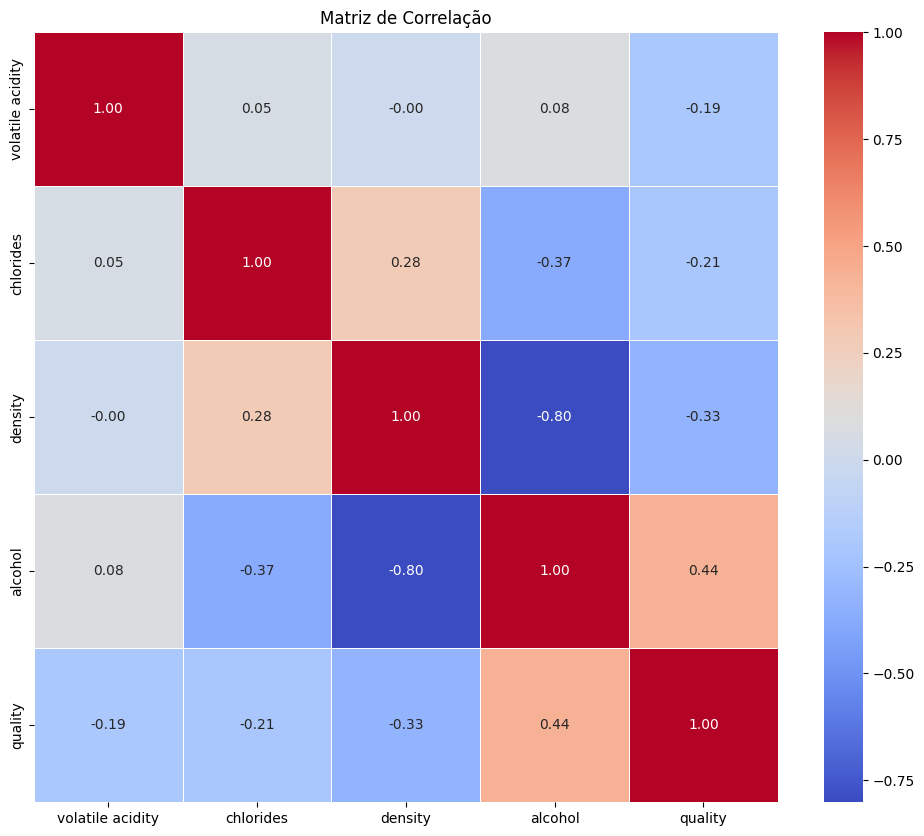

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar as features e a variável alvo para criar um único DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Calcular a matriz de correlação
correlation_matrix = train_data.corr()

# Criar um gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
X_train.head()

,volatile acidity,chlorides,density,alcohol
3115,0.17,0.040,0.99182,11.3
3088,0.37,0.024,0.98876,12.3
3919,0.31,0.035,0.98836,13.2
261,0.29,0.043,0.99960,8.9
2924,0.22,0.046,0.99834,9.1


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-2.03918555, -1.07958597, 33.4220453 ,  0.38676127])

In [ ]:
reg.intercept_

-30.794111904324282

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculando rmse
rmse = np.sqrt(mse)

# Média dos valores reais
mean_y = np.mean(y_test)

# RMSE em percentual para facilitar leitura do resultado
rmse_percent = (rmse / mean_y) * 100

print('MSE:', mse)
print('RMSE em %:', rmse_percent)

MSE: 0.5759086396706812
RMSE em %: 12.932565236646711


Melhor desempenho obtido dos testes de combinações:

*Resultados:*
* MSE: 0.57
* RMSE em %: 12.93

*Variáveis utilizadas no modelo:*
* Distancia de estação de metrô
* volatile acidity
* chlorides
* density
* alcohol



## 2.2.2) Gerando modelo para qualidade de vinho tinto

Campos do dataset:
*   0 = fixed acidity
*   1 = volatile acidity
*   2 = citric acid
*   3 = residual sugar
*   4 = chlorides
*   5 = free sulfur dioxide
*   6 = total sulfur dioxide
*   7 = density
*   8 = pH
*   9 = sulphates
*   10 = alcohol
*   11 = quality (alvo)

Text(0, 0.5, 'Qualidade')

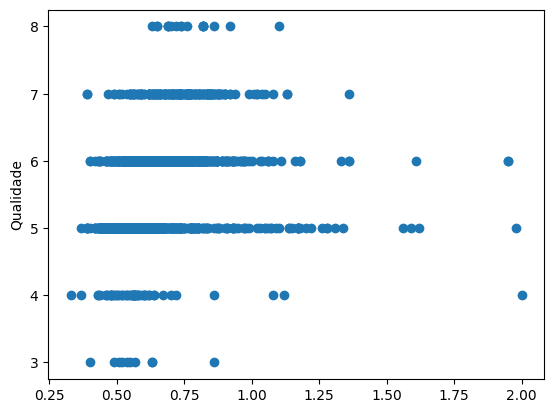

In [ ]:
# Analisando relações com a qualidade do Vinho Tinto
plt.scatter(x=redwine_data.iloc[:,9], y=redwine_data.iloc[:,11])
plt.xlabel("")
plt.ylabel("Qualidade")

In [ ]:
re_train, re_test = train_test_split(redwine_data, train_size=0.7)
X_train = re_train.iloc[:,[1,2,6,7,9,10]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[1,2,6,7,9,10]]
y_test = re_test.iloc[:,-1]

Analisando matriz de correlação das variáveis

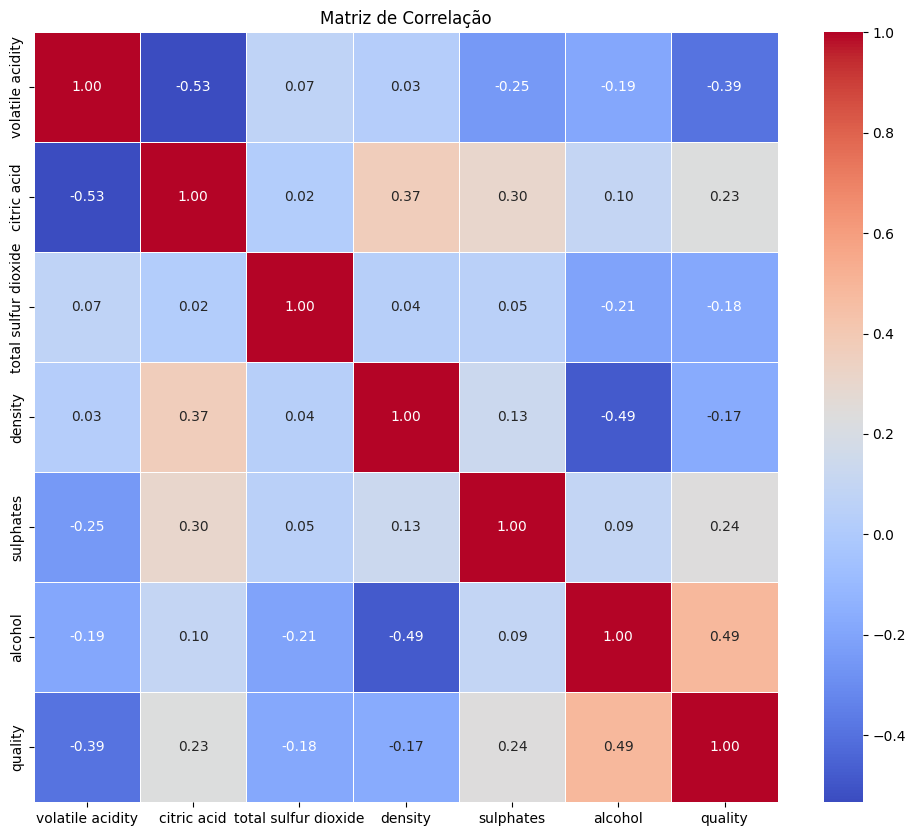

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar as features e a variável alvo para criar um único DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Calcular a matriz de correlação
correlation_matrix = train_data.corr()

# Criar um gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
X_train.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
1239,0.67,0.00,20.0,0.99488,0.56,11.8
354,0.21,0.40,165.0,0.99120,0.59,11.9
1228,0.42,0.00,88.0,0.99157,0.73,13.6
1432,0.44,0.00,11.0,0.99440,0.85,11.7
628,0.54,0.26,31.0,0.99760,0.60,9.3


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-1.27911441e+00, -3.74432342e-02, -1.97738014e-03,  1.47096629e+01,
        6.01197788e-01,  3.21547176e-01])

In [ ]:
reg.intercept_

-12.008785360721756

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculando rmse
rmse = np.sqrt(mse)

# Média dos valores reais
mean_y = np.mean(y_test)

# RMSE em percentual para facilitar leitura do resultado
rmse_percent = (rmse / mean_y) * 100

print('MSE:', mse)
print('RMSE em %:', rmse_percent)

MSE: 0.44096779480260506
RMSE em %: 11.753169206206753


Melhor desempenho obtido dos testes de combinações:

*Resultados:*
* MSE: 0.44
* RMSE em %: 11.75

*Variáveis utilizadas no modelo:*
* volatile acidity
* citric acid
* total sulfur dioxide
* density
* sulphates
* alcohol



## 2.3) Unificando os datasets

In [ ]:
frames = [whitewine_data, redwine_data]
df_vinhos = pd.concat(frames)

print("Dataset unificado: ")
df_vinhos.head(5)

Dataset unificado: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_vinhos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 2.4) Gerando modelo para dataset unificado

Campos do dataset:
*   0 = fixed acidity
*   1 = volatile acidity
*   2 = citric acid
*   3 = residual sugar
*   4 = chlorides
*   5 = free sulfur dioxide
*   6 = total sulfur dioxide
*   7 = density
*   8 = pH
*   9 = sulphates
*   10 = alcohol
*   11 = quality (alvo)

Text(0, 0.5, 'Qualidade')

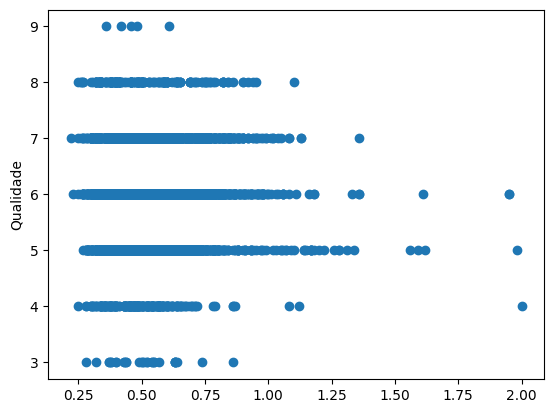

In [ ]:
# Analisando relações com a qualidade dos vinhos
plt.scatter(x=df_vinhos.iloc[:,9], y=df_vinhos.iloc[:,11])
plt.xlabel("")
plt.ylabel("Qualidade")

In [ ]:
re_train, re_test = train_test_split(df_vinhos, train_size=0.7)
X_train = re_train.iloc[:,[1,4,7,10]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[1,4,7,10]]
y_test = re_test.iloc[:,-1]

Analisando matriz de correlação das variáveis

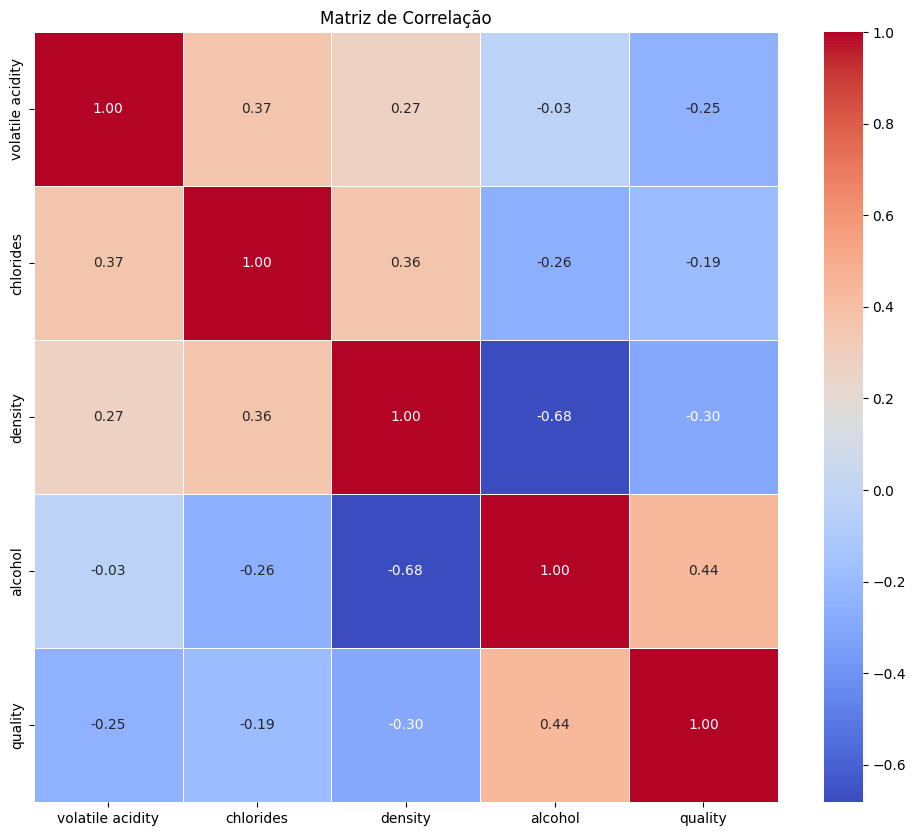

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar as features e a variável alvo para criar um único DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Calcular a matriz de correlação
correlation_matrix = train_data.corr()

# Criar um gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
X_train.head()

,volatile acidity,chlorides,density,alcohol
1330,0.21,0.050,0.99400,9.5
1128,0.43,0.095,0.99840,10.0
3731,0.34,0.041,0.99382,11.6
3206,0.29,0.031,0.99130,12.9
3825,0.46,0.034,0.99016,13.0


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-1.45536933, -0.16943767, 36.7853973 ,  0.37497552])

In [ ]:
reg.intercept_

-34.19996638628574

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculando rmse
rmse = np.sqrt(mse)

# Média dos valores reais
mean_y = np.mean(y_test)

# RMSE em percentual para facilitar leitura do resultado
rmse_percent = (rmse / mean_y) * 100

print('MSE:', mse)
print('RMSE em %:', rmse_percent)

MSE: 0.5353469635141248
RMSE em %: 12.621766291199119


Melhor desempenho obtido dos testes de combinações:

*Resultados:*
* MSE: 0.53
* RMSE em %: 12.62

*Variáveis utilizadas no modelo:*
* volatile acidity
* chlorides
* density
* alcohol

